In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [2]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

### 아파트 계약년월일 기준 오름차순

In [3]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
data['읍면동구분']=data['시군구'].apply(sort_dong)

In [8]:
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'

In [9]:
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
data['읍면동']=data['시군구'].apply(sort_dong2)

In [10]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [ ]:
data

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).mean()
    x=group_new['계약년'].index
    y=group_new['거래금액(만원)'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [18]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)
data['계약년']=data['계약년'].astype(int)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

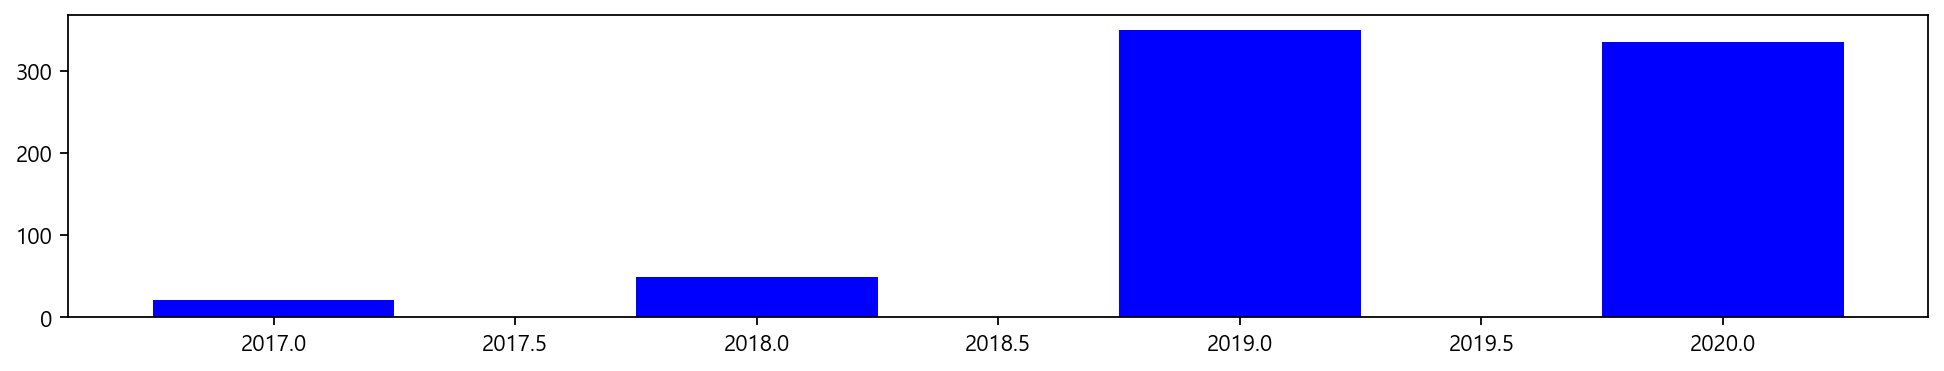

In [19]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'년도별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [ ]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [7]:
def riri(df):
    return int(float(df.replace(',','')))
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)

In [ ]:
data[data['읍면동']=='가람동']

In [ ]:
up=up.drop(['가람동','해밀동'])

In [ ]:
up=data.groupby('읍면동').mean()
up=up.drop(['가람동','해밀동'])
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(11,9),dpi=160)
plt.bar(x,y,width=0.5,color="plum")
plt.xticks(rotation=45,fontsize=15) 
plt.yticks(fontsize=18) 
a='동별 아파트 매매 평균 거래금액(만원)'
plt.title(a,fontsize=18)
plt.savefig(a+'.png')

In [ ]:
up['거래금액(만원)']

In [ ]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
up=data.groupby('읍면동').mean()
x=up.index
y=up['평당 가격(만원)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평당 가격'
plt.title(a)
plt.savefig(a+'.png')

In [21]:
data.corr()

,계약일,시군구,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,계약년
계약일,1.000000,-0.004070,0.000983,-0.030626,-0.036792,0.014077,-0.018463,-0.020603,0.025362,0.010985,-0.013103,0.068480
시군구,-0.004070,1.000000,-0.007778,0.274313,0.211742,-0.166860,-0.007915,-0.349583,-0.041887,0.388664,0.978714,-0.158652
부번,0.000983,-0.007778,1.000000,0.017081,-0.035856,-0.024618,-0.014081,-0.027308,0.011513,0.012297,-0.001439,0.004235
단지명,-0.030626,0.274313,0.017081,1.000000,0.134949,-0.003952,-0.072702,-0.184988,0.077478,0.290282,0.312160,-0.024643
전용면적(㎡),-0.036792,0.211742,-0.035856,0.134949,1.000000,0.523975,0.175624,0.260067,-0.036626,-0.011966,0.199033,-0.065208
거래금액(만원),0.014077,-0.166860,-0.024618,-0.003952,0.523975,1.000000,0.241177,0.582652,0.133574,-0.502794,-0.165366,0.280398
층,-0.018463,-0.007915,-0.014081,-0.072702,0.175624,0.241177,1.000000,0.211964,0.068539,-0.196522,-0.021412,-0.036474
건축년도,-0.020603,-0.349583,-0.027308,-0.184988,0.260067,0.582652,0.211964,1.000000,0.042439,-0.776780,-0.380223,0.068847
해제사유발생일,0.025362,-0.041887,0.011513,0.077478,-0.036626,0.133574,0.068539,0.042439,1.000000,-0.045107,-0.031026,NaN
읍면동구분,0.010985,0.388664,0.012297,0.290282,-0.011966,-0.502794,-0.196522,-0.776780,-0.045107,1.000000,0.412126,-0.015006


In [ ]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).mean()
    x=group_new.index
    y=group_new['평당 가격(만원)']
    plt.figure(figsize=(15,5),dpi=160)
    plt.bar(x,y,width=0.5,color="mediumvioletred")
    a=dong_one+' 평당 거래 금액(만원)'
    plt.xlabel='년도별'
    plt.ylabel='평당 가격'
    plt.title(a,fontsize=18)
    plt.savefig(a+'.png')

In [ ]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
new=data[data['읍면동']=='새롬동']
group_new=new.groupby(['계약년']).mean()
x=group_new.index#['계약년']
y=group_new['평당 가격(만원)']#.values
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="mediumseagreen")
a=dong_one+'평별 거래건수'
plt.title(a)
plt.show()

In [ ]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).mean()
    x=group_new.index
    y=group_new['평당 가격(만원)']
    print(dong_one)
    print(y)

In [ ]:
up=data.groupby('읍면동').mean()
x=up.index
y=up['전용면적(㎡)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평균 전용면적'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
na=data[data['읍면동']=='나성동']
na

In [ ]:
up=data.groupby('읍면동구분').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="#ADD8E6")
a='읍면동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data.groupby('읍면동구분').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="#ADD8E6")
a='읍면동별 아파트 매매 평균거래금액'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
sort_data=data.sort_values(by=['계약년월','계약일'])

In [ ]:
goun=sort_data[sort_data['읍면동']=='금남면']
goun[goun['계약년월']=='201901']

### 아파트 전용면적 별 거래 수

In [ ]:
sort_data['전용면적(㎡)'] =sort_data['전용면적(㎡)'].astype(int)
sort_data_g=sort_data.groupby(by=['전용면적(㎡)'], as_index=False).count()
sort_data_g=sort_data_g.sort_values(by='계약년월',ascending=False)[:10]

In [ ]:
sort_data_g

In [ ]:
sort_data_g['전용면적(㎡)'] =sort_data_g['전용면적(㎡)'].astype(str)
x=sort_data_g['전용면적(㎡)']
y=sort_data_g['계약년월']
#plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,color="blue")
a='아파트 전용면적별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 금액별 거래 수(제일 잘 팔리는 금액대)

In [ ]:
sort_data_m=sort_data.groupby(by=['거래금액(만원)'], as_index=False).count()
sort_data_m=sort_data_m.sort_values(by='계약년월',ascending=False)[:10]
sort_data_m

In [ ]:
sort_data_m['거래금액(만원)'] =sort_data_m['거래금액(만원)'].astype(str)
x=sort_data_m['거래금액(만원)']
y=sort_data_m['계약년월']
#plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,color="blue")
a='아파트 매매 가격별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
maxpr=np.max(sort_data['거래금액(만원)'])
maxpr

In [ ]:
minpr=np.min(sort_data['거래금액(만원)'])
minpr

In [ ]:
sort_data[sort_data['거래금액(만원)']==maxpr]

In [ ]:
sort_data[sort_data['거래금액(만원)']==minpr]

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

In [ ]:
up=data.groupby('평').count()

In [ ]:
up=data.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

<AxesSubplot:>

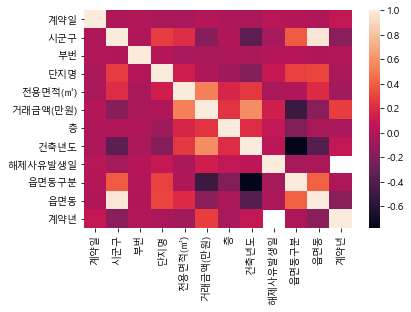

In [22]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
labelencoder_x= LabelEncoder()
y = data["시군구"]
data["시군구"]=labelencoder_x.fit_transform(y)
y = data["단지명"]
data["단지명"]=labelencoder_x.fit_transform(y)
y = data["읍면동구분"]
data["읍면동구분"]=labelencoder_x.fit_transform(y)
y = data["읍면동"]
data["읍면동"]=labelencoder_x.fit_transform(y)
sns.heatmap(data.corr())

In [23]:
data.corr()

,계약일,시군구,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,계약년
계약일,1.000000,-0.004070,0.000983,-0.030626,-0.036792,0.014077,-0.018463,-0.020603,0.025362,0.010985,-0.013103,0.068480
시군구,-0.004070,1.000000,-0.007778,0.274313,0.211742,-0.166860,-0.007915,-0.349583,-0.041887,0.388664,0.978714,-0.158652
부번,0.000983,-0.007778,1.000000,0.017081,-0.035856,-0.024618,-0.014081,-0.027308,0.011513,0.012297,-0.001439,0.004235
단지명,-0.030626,0.274313,0.017081,1.000000,0.134949,-0.003952,-0.072702,-0.184988,0.077478,0.290282,0.312160,-0.024643
전용면적(㎡),-0.036792,0.211742,-0.035856,0.134949,1.000000,0.523975,0.175624,0.260067,-0.036626,-0.011966,0.199033,-0.065208
거래금액(만원),0.014077,-0.166860,-0.024618,-0.003952,0.523975,1.000000,0.241177,0.582652,0.133574,-0.502794,-0.165366,0.280398
층,-0.018463,-0.007915,-0.014081,-0.072702,0.175624,0.241177,1.000000,0.211964,0.068539,-0.196522,-0.021412,-0.036474
건축년도,-0.020603,-0.349583,-0.027308,-0.184988,0.260067,0.582652,0.211964,1.000000,0.042439,-0.776780,-0.380223,0.068847
해제사유발생일,0.025362,-0.041887,0.011513,0.077478,-0.036626,0.133574,0.068539,0.042439,1.000000,-0.045107,-0.031026,NaN
읍면동구분,0.010985,0.388664,0.012297,0.290282,-0.011966,-0.502794,-0.196522,-0.776780,-0.045107,1.000000,0.412126,-0.015006


In [ ]:
toto=data.corr()
toto['거래금액(만원)']

### 연립 다주택

In [ ]:
yata = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')
yata["평"]=yata["전용면적(㎡)"].apply(pyeong)
yata

In [ ]:
yata['읍면동구분']=yata['시군구'].apply(sort_dong)
yata['읍면동']=yata['시군구'].apply(sort_dong2)

In [ ]:
up=yata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(10,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=yata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(4,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=yata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 단독다가구 - 전용면적 없음

In [ ]:
danta = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')
danta["평"]=danta["연면적(㎡)"].apply(pyeong)

In [ ]:
danta['읍면동구분']=danta['시군구'].apply(sort_dong)
danta['읍면동']=danta['시군구'].apply(sort_dong2)

In [ ]:
up=danta.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=danta.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(9,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")

In [ ]:
def rep(df):
    if df == '-':
        return 0
    elif df.find('m이상') != -1:
        return df.replace('m이상','')
    else:
        return df.replace('m미만','')

In [ ]:
danta["도로"]=danta["도로조건"].apply(rep)

In [ ]:
def riri(df):
    return int(float(df.replace(',','')))

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = danta["시군구"]
danta["시군구2"]=labelencoder_x.fit_transform(y)
z = danta["주택유형"]
danta["주택유형2"]=labelencoder_x.fit_transform(z)
danta['거래금액2(만원)']= danta['거래금액(만원)'].apply(riri)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
danta_null=danta[danta['건축년도'].isnull()]

In [ ]:
#null 값이 아닌 것만 뽑아오기
idx_not=danta[danta['건축년도'].isnull()].index
danta_notnull=danta.drop(idx_not)

In [ ]:
X = danta_notnull[["계약년월","연면적(㎡)","대지면적(㎡)","거래금액2(만원)","도로","시군구2","주택유형2"]]
y = danta_notnull['건축년도']

In [ ]:
lm.fit(X,y)

In [ ]:
X2 = danta_null[["계약년월","연면적(㎡)","대지면적(㎡)","거래금액2(만원)","도로","시군구2","주택유형2"]]

In [ ]:
predictions = lm.predict(X2)
predictions=predictions.astype(int)

In [ ]:
#적용 완료
for i in range(len(danta_null.index)):
    danta.loc[ danta_null.index[i] , "건축년도" ]=int(predictions[i])

In [ ]:
up=danta.groupby('주택유형').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 주택유형별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up =danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 단독다가구 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 오피스텔

In [ ]:
oata = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')
oata["평"]=oata["전용면적(㎡)"].apply(pyeong)

In [ ]:
oata['읍면동구분']=oata['시군구'].apply(sort_dong)
oata['읍면동']=oata['시군구'].apply(sort_dong2)

In [ ]:
up=oata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 오피스텔 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=oata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 오피스텔 매매건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=oata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 오피스텔 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 매매 총 합

In [ ]:
data_all = pd.concat([data,yata,danta,oata], ignore_index=True)
data_all

In [ ]:
data_all['읍면동구분']=data_all['시군구'].apply(sort_dong)
data_all['읍면동']=data_all['시군구'].apply(sort_dong2)

In [ ]:
up=data_all.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data_all.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 총 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

## 매매로 세종시로 오는 이사건 수

In [ ]:
data_all['계약년월'] =data_all['계약년월'].astype(str)
tt1=data_all.groupby('계약년월').count()

In [ ]:
tt1=data_all.groupby('계약년월').count()
plt.plot(tt1.index,tt1['계약일'])
plt.figure(figsize=(15,2.5),dpi=160)
plt.axis([0, 5, 0, 1700])

### 달별 매매 이사건수(2020년 11월 12월 데이터 없음) 

In [ ]:
def mon(df):
    return df[-2:]

In [ ]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

In [ ]:
data_all['계약년월']=data_all['계약년월'].astype(str)
data_all['계약월']=data_all['계약년월'].apply(mon)
tt2=data_all.groupby('계약월').count()
x=tt2.index
y=tt2['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_all['계약년']=data_all['계약년월'].apply(year)
tt2_1=data_all.groupby('계약년').count()
x=tt2_1.index
y=tt2_1['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 전월세

In [ ]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

In [ ]:
up=data_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 평별 아파트 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='월세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
#### 이거 전세가액 구하는 공식
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
all_data2 = pd.merge(left=data,right=data_jeon2,how='left',on=["계약년월",'시군구','단지명','전용면적(㎡)'],sort=False)
idx_not=all_data2[all_data2['계약일_y'].isnull()].index
all_data2_notnull=all_data2.drop(idx_not)
all_data2_notnull['보증금(만원)']=all_data2_notnull['보증금(만원)'].apply(riri)
all_data2_notnull['전세가율']=(all_data2_notnull['보증금(만원)']/all_data2_notnull['거래금액(만원)'])*100
#all_data2_notnull.groupby('계약년월').mean()

In [ ]:
all_data2 = pd.merge(left=data,right=data_jeon2,how='left',on=["계약년월",'시군구','단지명','전용면적(㎡)'],sort=False)

In [ ]:
idx_not=all_data2[all_data2['계약일_y'].isnull()].index
all_data2_notnull=all_data2.drop(idx_not)
#all_data2_notnull

In [ ]:
all_data2_notnull['보증금(만원)']=all_data2_notnull['보증금(만원)'].apply(riri)
all_data2_notnull['전세가율']=(all_data2_notnull['보증금(만원)']/all_data2_notnull['거래금액(만원)'])*100

In [ ]:
tt1=all_data2_notnull.groupby('계약년월').mean()
plt.figure(figsize=(15,2.5),dpi=160)
plt.plot(tt1.index,tt1['전세가율'])
a='날짜별 전세가율'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
apart = pd.concat([data,data_jeon], ignore_index=True)
apart

In [ ]:
up=apart.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매와 전세 거래건 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 구분별 아파트 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='아파트 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon=data_jeon[data_jeon['전월세구분']=='월세']
up=data_jeon.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=2,color="blue")
a='아파트 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 연립 전월세

In [ ]:
yata_jeon = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
yata_jeon["평"]=yata_jeon["전용면적(㎡)"].apply(pyeong)

In [ ]:
up=yata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 평별 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=yata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
#yata_jeon.groupby('보증금(만원)').count()
up=yata_jeon[yata_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.8,color="blue")
a='연립다가구 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
#yata_jeon.groupby('월세(만원)').count()
up=yata_jeon[yata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
yata_jeon2=yata_jeon[yata_jeon['전월세구분']=='전세']
all_yata2 = pd.merge(left=yata,right=yata_jeon2,how='left',on=["계약년월",'시군구','건물명','전용면적(㎡)'],sort=False)
idx_not=all_yata2[all_yata2['계약일_y'].isnull()].index
all_yata2_notnull=all_yata2.drop(idx_not)
all_yata2_notnull['보증금(만원)']=all_yata2_notnull['보증금(만원)'].apply(riri)
all_yata2_notnull['거래금액(만원)']=all_yata2_notnull['거래금액(만원)'].apply(riri)
all_yata2_notnull['전세가율']=(all_yata2_notnull['보증금(만원)']/all_yata2_notnull['거래금액(만원)'])*100
all_yata2_notnull.groupby('계약년월').mean()

### 단독 전월세

In [ ]:
danta_jeon = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
danta_jeon["평"]=danta_jeon["계약면적(㎡)"].apply(pyeong)

In [ ]:
up=danta_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=danta_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
danta_jeon.groupby('보증금(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전세 보증금 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
danta_jeon.groupby('월세(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=1,color="blue")
a='단독다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
danta

In [ ]:
###단독주택은 안 먹히는 듯
danta_jeon2=danta_jeon[danta_jeon['전월세구분']=='전세']
all_danta2 = pd.merge(left=danta,right=danta_jeon2,how='left',on=["계약년월",'시군구','계약면적(㎡)'],sort=False)
idx_not=all_yata2[all_danta2['계약일_y'].isnull()].index
all_danta2_notnull=all_danta2.drop(idx_not)
all_danta2_notnull['보증금(만원)']=all_danta2_notnull['보증금(만원)'].apply(riri)
all_danta2_notnull['거래금액(만원)']=all_danta2_notnull['거래금액(만원)'].apply(riri)
all_danta2_notnull['전세가율']=(all_danta2_notnull['보증금(만원)']/all_danta2_notnull['거래금액(만원)'])*100
all_danta2_notnull.groupby('계약년월').mean()

### 오피스텔 전월세

In [ ]:
oata_jeon = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')
oata_jeon["평"]=oata_jeon["전용면적(㎡)"].apply(pyeong)

In [ ]:
up=oata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=oata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
#oata_jeon.groupby('월세(만원)').count()
#danta_jeon.groupby('월세(만원)').count()
up=oata_jeon[oata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
###오피스텔 전세가율
oata_jeon2=oata_jeon[oata_jeon['전월세구분']=='전세']
all_oata2 = pd.merge(left=oata,right=oata_jeon2,how='left',on=["계약년월",'시군구','전용면적(㎡)','단지명'],sort=False)
idx_not=all_oata2[all_oata2['계약일_y'].isnull()].index
all_oata2_notnull=all_oata2.drop(idx_not)
all_oata2_notnull['보증금(만원)']=all_oata2_notnull['보증금(만원)'].apply(riri)
all_oata2_notnull['거래금액(만원)']=all_oata2_notnull['거래금액(만원)'].apply(riri)
all_oata2_notnull['전세가율']=(all_oata2_notnull['보증금(만원)']/all_oata2_notnull['거래금액(만원)'])*100
all_oata2_notnull.groupby('계약년월').mean()

In [ ]:
### 전월세 총합

In [ ]:
data_jeon_all = pd.concat([data_jeon,yata_jeon,danta_jeon,oata_jeon], ignore_index=True)
data_jeon_all

In [ ]:
data_jeon_all['계약년월']=data_jeon_all['계약년월'].astype(str)
data_jeon_all['계약월']=data_jeon_all['계약년월'].apply(mon)

In [ ]:
up=data_jeon_all.groupby('계약월').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='총 전월세 월별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon_all['계약년']=data_jeon_all['계약년월'].apply(year)

In [ ]:
up=data_jeon_all.groupby('계약년').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 총 전월세 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data_jeon_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
data_jeon_all

### 토지매매 실거래

In [ ]:
def pyeong2(df):
    return int(df/3.3)

In [ ]:
tata = pd.read_csv('12.세종시_토지(매매)_실거래가.csv')
tata["평"]=tata["계약면적(㎡)"].apply(pyeong2)
tata

In [ ]:
up=tata.groupby('지목').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='지목별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=tata.groupby('용도지역').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(16,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='용도지역별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=tata.groupby('평').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 분양권 실거래가

In [ ]:
bunta = pd.read_csv('13.세종시_분양권_실거래가.csv')
bunta["평"]=bunta["전용면적(㎡)"].apply(pyeong)

In [ ]:
bunta

In [ ]:
up=bunta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 분양권 거래수'
plt.title(a)
plt.savefig(a+'.png')